# Linear Regression

In [4]:
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
## Generating data points

n_points = 20
x = np.random.random(n_points)
x = np.sort(x)
f = lambda x: 5*x + 2
## Adding some noise
y = f(x) + np.random.normal(loc = 0, scale = 0.5, size = n_points)

## We need to reshape the data so we can use the algorithm

X = x.reshape((-1,1))
Y = y.reshape((-1,1))

In [44]:
x.shape, y.shape

((20,), (20,))

In [45]:
X.shape, Y.shape

((20, 1), (20, 1))

In [40]:
## Creating and fitting the linear model

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)

In [41]:
## Computing some metrics

r_squared = model.score(X, Y)
res = model.predict(X)
mse = np.mean((res - y)**2)

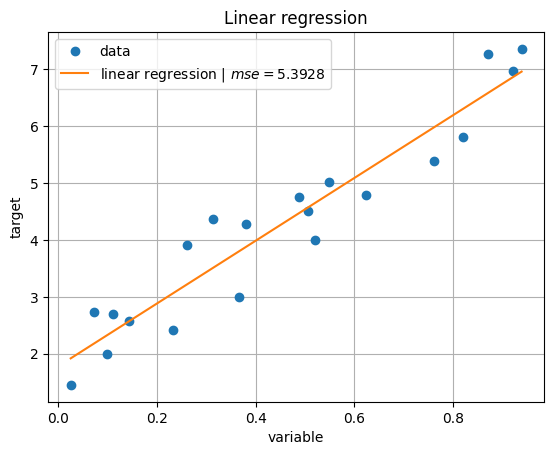

In [42]:
plt.plot(x, y, "o", label = "data")
plt.plot(x, y_pred, label = "linear regression | $mse = {:.4f}$".format(mse))
# plt.ylim(1.5, 8)
plt.xlabel("variable")
plt.ylabel("target")
plt.title("Linear regression")
plt.legend()
plt.grid()

## Overfitting, underfitting

In [14]:
## Generating data points

n_points = 50
x = np.linspace(-10,10,n_points)
y = 0.2*x**3 - 4*x + 2 + np.random.normal(loc = 0, scale = 30, size = n_points)

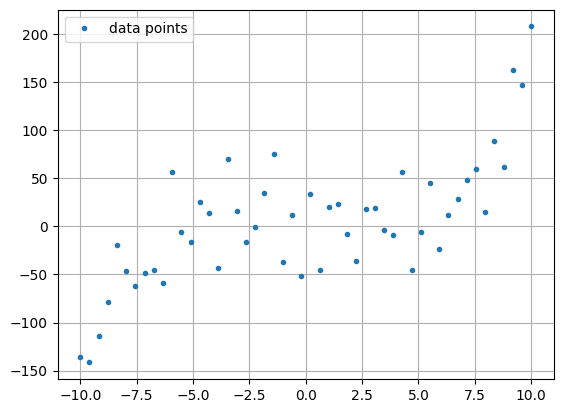

In [15]:
## First plot of the data
plt.plot(x,y, ".", label = "data points")
plt.grid()
plt.legend()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
## Fitting a model that is too simple

poly_under = PolynomialFeatures(degree=1, include_bias=True)
poly_under_features = poly_under.fit_transform(x.reshape(-1, 1))
poly_under_reg_model = LinearRegression()
poly_under_reg_model.fit(poly_under_features, y.reshape((-1,1)))
y_under_predicted = poly_under_reg_model.predict(poly_under_features)

mse_under_predicted  = np.mean((y_under_predicted - y)**2)



In [18]:
## Fitting a model that is too complex

poly_over = PolynomialFeatures(degree=20, include_bias=True)
poly_over_features = poly_over.fit_transform(x.reshape(-1, 1))
poly_over_reg_model = LinearRegression()
poly_over_reg_model.fit(poly_over_features, y.reshape((-1,1)))
y_over_predicted = poly_over_reg_model.predict(poly_over_features)

mse_over_predicted  = np.mean((y_over_predicted - y)**2)


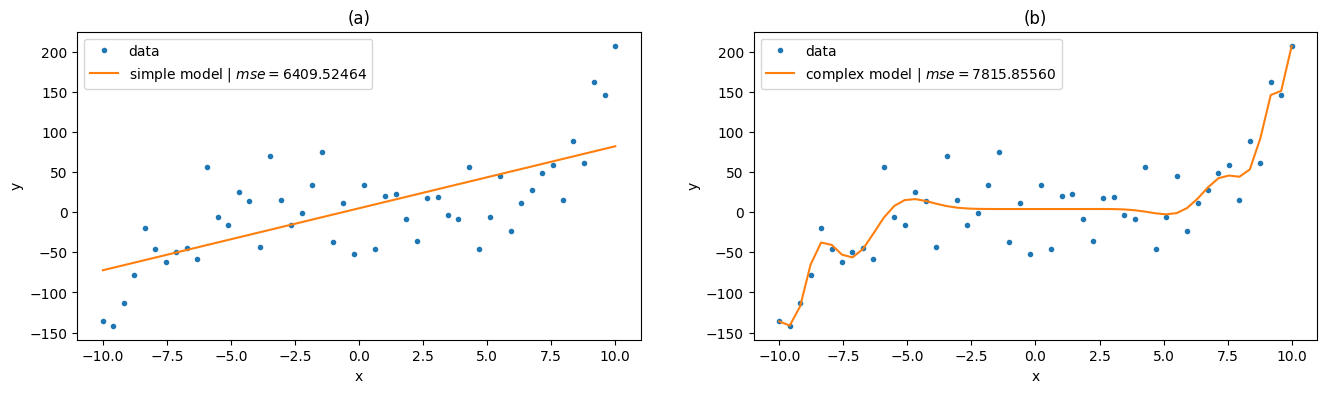

In [21]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.plot(x, y, ".", label = "data")
plt.plot(x, y_under_predicted, label = "simple model | $mse = {:.5f}$".format(mse_under_predicted))
plt.xlabel("x")
plt.ylabel("y")
plt.title("(a)")
plt.legend()


plt.subplot(1,2,2)
plt.plot(x, y, ".", label = "data")
plt.plot(x, y_over_predicted, label = "complex model | $mse = {:.5f}$".format(mse_over_predicted ))
plt.xlabel("x")
plt.ylabel("y")
plt.title("(b)")
plt.legend()


In [22]:
## Fitting the model with the right complexity

poly = PolynomialFeatures(degree=3, include_bias=True)
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y.reshape((-1,1)))
y_predicted = poly_reg_model.predict(poly_features)

mse_predicted  = np.mean((y_predicted - y)**2)

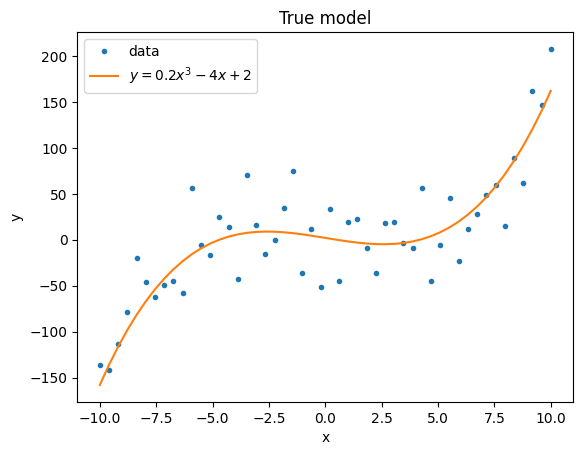

In [23]:
poly_three = lambda x: 0.2*x**3 - 4*x + 2
plt.plot(x, y, ".", label = "data")
plt.plot(x, poly_three(x), label = "$y = 0.2 x^3 - 4x + 2$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("True model")
plt.legend()

# KNN

## Regression

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [49]:
# Load the Boston housing dataset
california = fetch_california_housing()

In [52]:
california.data.shape

(20640, 8)

In [54]:
california.target.shape

(20640,)

In [26]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.3, random_state=42)

In [27]:
# Create a KNN regressor object with k=5
knn = KNeighborsRegressor(n_neighbors=5)

In [28]:
# Train the KNN regressor on the training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [29]:
# Use the trained KNN regressor to predict the target values for the test data
y_pred = knn.predict(X_test)

In [30]:
# Calculate the mean squared error (MSE) of the KNN regressor
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.136942049088978


## Classification (Homework)

In [1]:
# Import necessary libraries


In [75]:
# Load the iris dataset


In [ ]:
# Visualize the dataset using a scatter plot


expected output

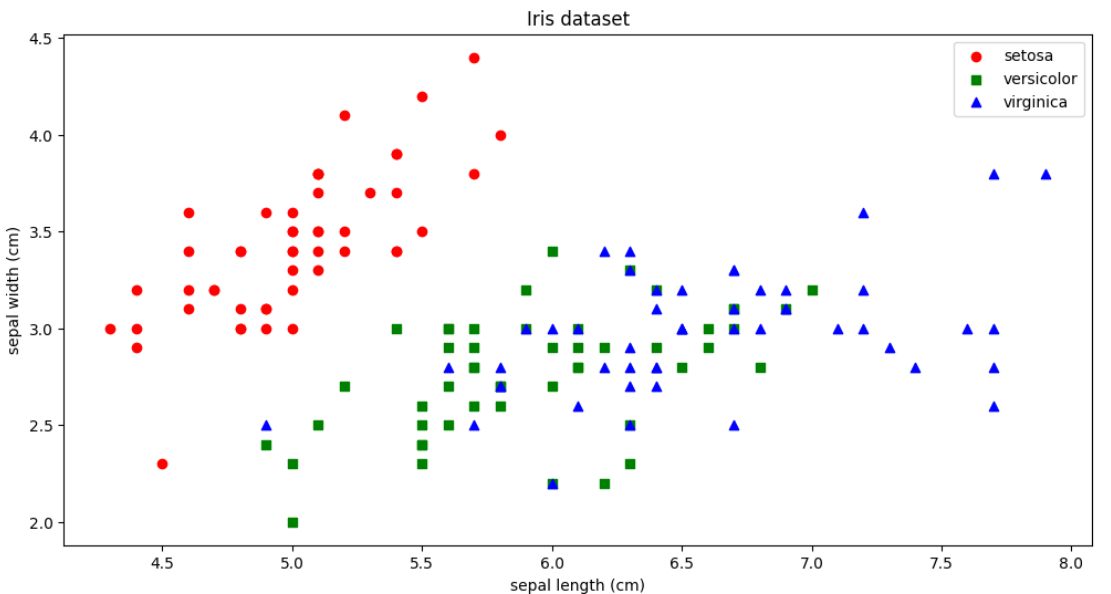

In [2]:
from IPython import display
display.Image("iris.png")

In [77]:
# Split the dataset into training and testing data (30% for testing)


In [78]:
# Create a KNN classifier object with k=3


In [3]:
# Train the KNN classifier on the training data


In [80]:
# Use the trained KNN classifier to predict the class labels for the test data


In [4]:
# Calculate the accuracy of the KNN classifier
accuracy = ??
print("Accuracy:", accuracy)

# Decision Tree

## Regression

In [31]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

In [32]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.3, random_state=42)

In [33]:
# Create a DT regressor on the training data
dt = DecisionTreeRegressor()

In [34]:
# Train the DT regressor on the training data
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
# Use the trained DT classifier to predict the class labels for the test data
y_pred = dt.predict(X_test)

In [36]:
# Calculate the mean squared error (MSE) of the DT regressor
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5411007122296673


## Classification (Homework)

In [94]:
# Import necessary libraries


In [95]:
# Split the dataset into training and testing data (use iris dataset)


In [96]:
# Create a DT classifier object


In [5]:
# Train the DT classifier on the training data


In [6]:
# Use the trained DT classifier to predict the class labels for the test data


In [7]:
# Calculate the accuracy of the DT classifier
accuracy = ??
print("Accuracy:", accuracy)